# Final Project -- Tasks are prepared by GlobalAIHub
In this project, our aim is to building a model for predicting dimond prices. Our label (output) will be price column. Do not forget, this is a Classification problem!

## Content
* carat: weight of the diamond (0.2--5.01)
* cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* color: diamond colour, from J (worst) to D (best)
* clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* x: length in mm (0--10.74)
* y: width in mm (0--58.9)
* z: depth in mm (0--31.8)
* depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
* table: width of top of diamond relative to widest point (43--95)
 
## Steps
* Read the diamonds.csv file and describe it.
* Make at least 4 different analysis on Exploratory Data Analysis section.
* Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
* Define appropriate evaluation metric for our case (classification). Hint: Is there any imbalanced problem in the label column?
* Split the dataset into train and test set. (Consider the imbalanced problem if is there any). Check the distribution of labels in the subsets (train and test).
* Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
* Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
* Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
* Analyse and compare results of 3 algorithms.
* Select best performing model based on evaluation metric you chose on test dataset.
Good luck :)

### [Preprocessing](#1)
* Are there any duplicated values?
* Do we need to do feature scaling?
* Do we need to generate new features?
* Split dataset into train and test sets. (0.7/0.3)

### [ML Application](#2)
* Define models.
* Fit models.
* Evaluate models for both train and test dataset.
* Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
* Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

### [Evaluation](#3)
* Select the best performing model and write your comments about why choose this model.
* Analyse results and make comment about how you can improve model.

## Esma Tayran

<a id=1></a>
## Preprocessing

In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from scipy import stats

In [88]:
# Read csv
data = pd.read_csv("https://raw.githubusercontent.com/globalaihub/introduction-to-machine-learning/main/Final%20Project/diamonds.csv")

In [89]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analyse missing values

In [90]:
data.head(20)

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low
5,6,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48,Very Low
6,7,0.24,Very Good,I,VVS1,62.3,57.0,3.95,3.98,2.47,Very Low
7,8,0.26,Very Good,H,SI1,61.9,55.0,4.07,4.11,2.53,Very Low
8,9,0.22,Fair,E,VS2,65.1,61.0,3.87,3.78,2.49,Very Low
9,10,0.23,Very Good,H,VS1,59.4,61.0,4.00,4.05,2.39,Very Low


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
index      53940 non-null int64
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
price      53940 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 4.5+ MB


There are no null values. Let's check whether are there duplicated values or not.

In [92]:
data.duplicated().sum()

0

Since there are no duplicated values, just move on.

In [93]:
#different price values
price_species = data['price'].value_counts()
price_species

Very Low     34663
Low          11271
Medium        4109
High          2308
Very High     1589
Name: price, dtype: int64

In [94]:
#drop index column
data.drop(columns = ['index'], inplace = True)
data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,Very Low
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,Very Low
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,Very Low
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,Very Low


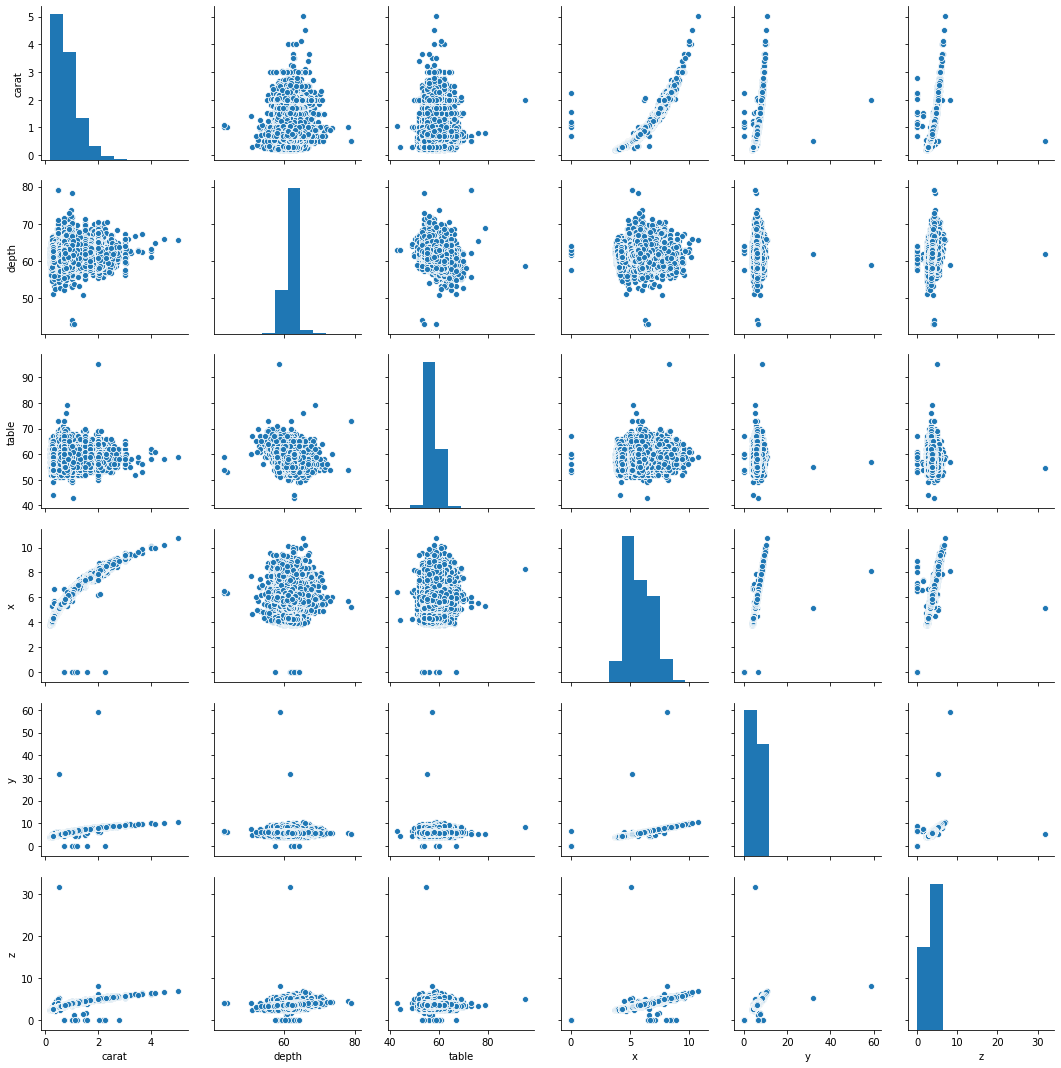

In [95]:
sns.pairplot(data)

In [96]:
data.corr()

,carat,depth,table,x,y,z
carat,1.000000,0.028224,0.181618,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.195344,0.183760,0.150929
x,0.975094,-0.025289,0.195344,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.970772,0.952006,1.000000


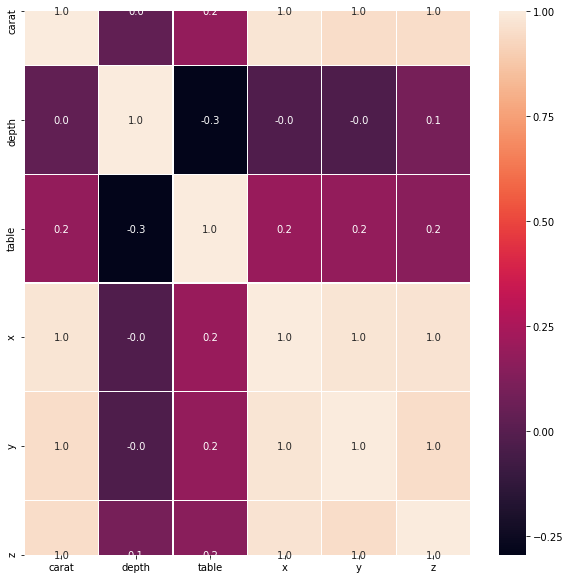

In [97]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(),annot=True, linewidth=.2,fmt='.1f',ax=ax)
plt.show()

In [98]:
data.describe()

,carat,depth,table,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


There are some odd values in x(length), y(width) and z(depth) columns. Those values can not be 0. So, these rows are needed to be dropped.

In [99]:
#finding 0 values on x, y, and z's
data.loc[(data['x']==0) | (data['y']==0) | (data['z']==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
2207,1.00,Premium,G,SI2,59.1,59.0,6.55,6.48,0.0,Very Low
2314,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,Very Low
4791,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,Very Low
5471,1.01,Premium,F,SI2,59.2,58.0,6.50,6.47,0.0,Very Low
10167,1.50,Good,G,I1,64.0,61.0,7.15,7.04,0.0,Low
11182,1.07,Ideal,F,SI2,61.6,56.0,0.00,6.62,0.0,Low
11963,1.00,Very Good,H,VS2,63.3,53.0,0.00,0.00,0.0,Low
13601,1.15,Ideal,G,VS2,59.2,56.0,6.88,6.83,0.0,Low
15951,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,Low
24394,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,High


In [100]:
#dropping 0 values
data = data[(data[['x','y','z']] != 0).all(axis=1)]
data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,Very Low
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,Very Low
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,Very Low
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,Very Low


In [101]:
#check
data.loc[(data['x']==0) | (data['y']==0) | (data['z']==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [104]:
#Categorical labelling
label_cut = LabelEncoder()
label_color = LabelEncoder()
label_clarity = LabelEncoder()
label_price = LabelEncoder()

data['cut'] = label_cut.fit_transform(data['cut'])
data['color'] = label_color.fit_transform(data['color'])
data['clarity'] = label_clarity.fit_transform(data['clarity'])
data['price'] = label_price.fit_transform(data['price'])

In [105]:
data.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43,4
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31,4
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31,4
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63,4
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75,4
5,0.24,4,6,7,62.8,57.0,3.94,3.96,2.48,4
6,0.24,4,5,6,62.3,57.0,3.95,3.98,2.47,4
7,0.26,4,4,2,61.9,55.0,4.07,4.11,2.53,4
8,0.22,0,1,5,65.1,61.0,3.87,3.78,2.49,4
9,0.23,4,4,4,59.4,61.0,4.00,4.05,2.39,4


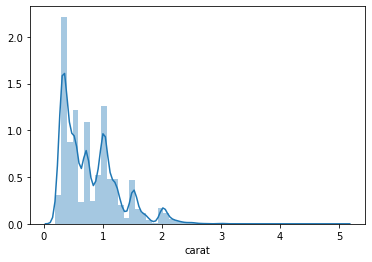

In [109]:
sns.distplot(data["carat"])

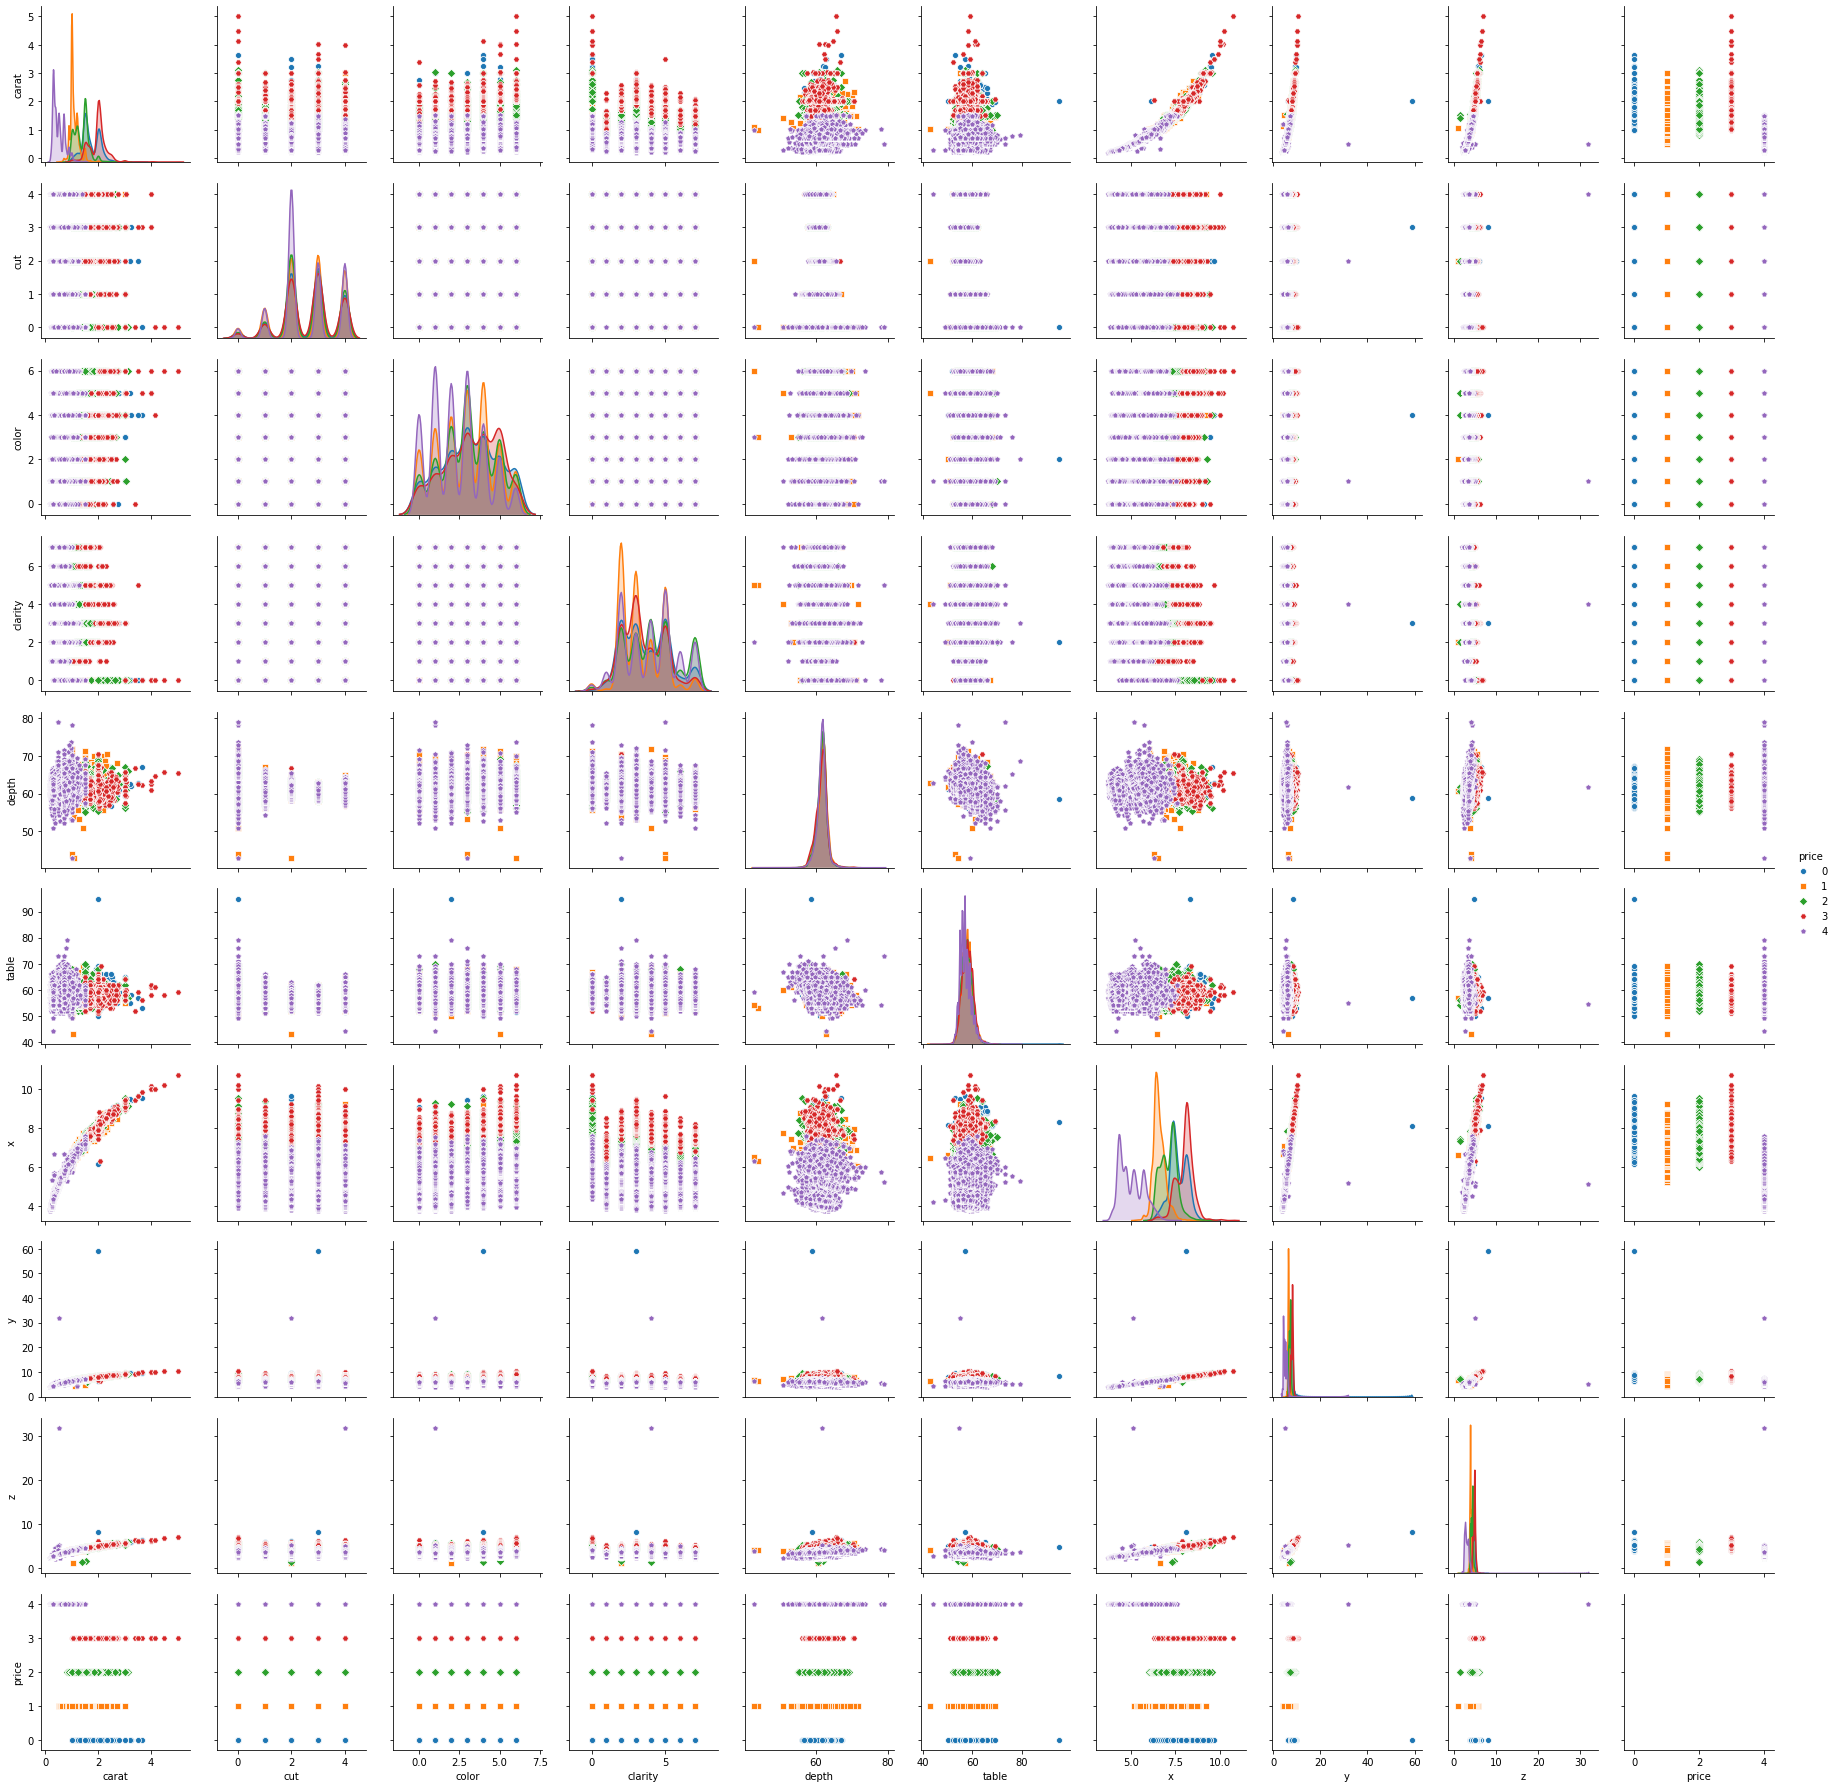

In [111]:
sns.pairplot(data, hue="price", markers=["o", "s", "D", "H", "p"])

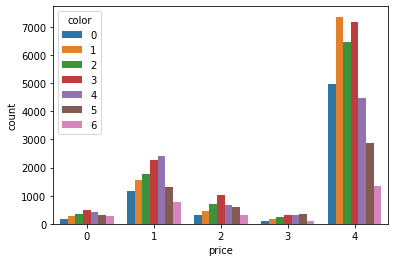

In [117]:
ax = sns.countplot(x="price", hue="color", data=data)

In [150]:
#train-test-split
y=data.price
data_except_price=data.drop(['price'], axis=1)
X=data_except_price

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<a id=2></a>
## ML Application

In [143]:
#Decision Tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train,y_train)

print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.8666543026706232
Accuracy of test: 0.8646142433234422


In [144]:
#Confusion Matrix for Decision Tree
y_pred_clf = clf.predict(X)
confusion_matrix(y, y_pred_clf)

array([[ 1112,    87,   577,   530,     0],
       [  150,  9243,   572,    26,  1275],
       [  690,  1313,  2008,    95,     3],
       [  527,    38,    49,   969,     0],
       [    5,  1280,     5,     1, 33365]], dtype=int64)

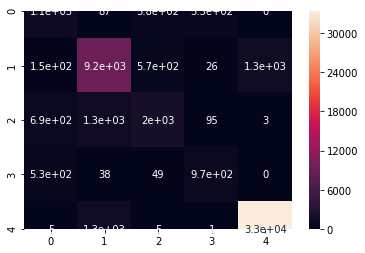

In [145]:
cm = confusion_matrix(y, clf.predict(X))
sns.heatmap(cm, annot=True)

In [146]:
y_pred_clf = clf.predict(X)
print(classification_report(y,y_pred_clf))

              precision    recall  f1-score   support

           0       0.45      0.48      0.46      2306
           1       0.77      0.82      0.80     11266
           2       0.63      0.49      0.55      4109
           3       0.60      0.61      0.60      1583
           4       0.96      0.96      0.96     34656

    accuracy                           0.87     53920
   macro avg       0.68      0.67      0.68     53920
weighted avg       0.86      0.87      0.86     53920



In [147]:
clf.score(X,y)

0.8660422848664688

In [165]:
type(clf), type(y_pred_clf), type(cm), type(y)

(sklearn.tree.tree.DecisionTreeClassifier,
 numpy.ndarray,
 numpy.ndarray,
 pandas.core.series.Series)

In [151]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

data_model=RandomForestRegressor(random_state=42)
data_model.fit(X_train,y_train)

data_predictions = data_model.predict(X_test)
data_test = mean_absolute_error(data_predictions,y_test)

print("Accuracy of train:",data_model.score(X_train,y_train))
print("Accuracy of test:",data_model.score(X_test,y_test))
print("Validation Mean Absolute Error for Random Forest Model: {}".format(data_test))

Accuracy of train: 0.9722338569700582
Accuracy of test: 0.8353563729914723
Validation Mean Absolute Error for Random Forest Model: 0.20900098911968348


In [131]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(random_state = 42)
model.fit(X, y)

print("Accuracy of train:",model.score(X_train,y_train))
print("Accuracy of test:",model.score(X_test,y_test))

Accuracy of train: 0.841484739296312
Accuracy of test: 0.8424208704253214


In [167]:
#Confusion Matrix for Logistic Regression
y_pred_lr = model.predict(X)
confusion_matrix(y, y_pred_lr)

array([[  432,   695,   786,   393,     0],
       [   37,  9906,    77,    13,  1233],
       [   95,  3225,   693,    85,    11],
       [  284,    91,   344,   864,     0],
       [    0,  1161,     2,     0, 33493]], dtype=int64)

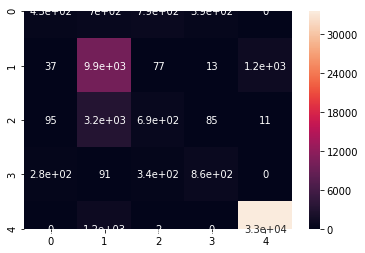

In [168]:
cm3 = confusion_matrix(y, model.predict(X))
sns.heatmap(cm3, annot=True)

In [169]:
y_pred_model = model.predict(X)
print(classification_report(y,y_pred_model))

              precision    recall  f1-score   support

           0       0.51      0.19      0.27      2306
           1       0.66      0.88      0.75     11266
           2       0.36      0.17      0.23      4109
           3       0.64      0.55      0.59      1583
           4       0.96      0.97      0.97     34656

    accuracy                           0.84     53920
   macro avg       0.63      0.55      0.56     53920
weighted avg       0.83      0.84      0.82     53920



In [170]:
model.score(X,y)

0.8417655786350149

<a id=3></a>
## Evaluation

* R^2 value for Decision Tree: 0.8660422848664688
* R^2 value for Logistic Regression: 0.8417655786350149

There is no significant difference between these two values. 